## Get a set of enhancers known to be constrained or not, together with their Chen scores 

In [1]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

In [2]:
import pandas as pd

def read_disease_enhancers_intersect_chen_windows():
  # download-process-data/khurana/README.md
  df = pd.read_csv(
      f"{CONSTRAINT_TOOLS_DATA}/khurana/disease-enhancers-intersect-chen-windows.bed", 
      sep = '\t',
      names = [
          'chrom_enhancer', 'start_enhancer', 'end_enhancer', 
          'disease', 'enhancer_predicted_LoF_tolerance_prob', 'enhancer_predicted_LoF_tolerance_status', 
          'chrom_window', 'start_window', 'end_window', 
          'new_chen_score_window'
      ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window',
    'disease', 'enhancer_predicted_LoF_tolerance_prob', 'enhancer_predicted_LoF_tolerance_status'
  ])
  df = df.rename(columns={
    'chrom_enhancer': 'chrom', 
    'start_enhancer': 'start', 
    'end_enhancer': 'end'
  })
  df['truly constrained'] = True
  df['tag'] = 'disease_enhancers'
  return df 

read_disease_enhancers_intersect_chen_windows()

,chrom,start,end,negative_new_chen_score_window,truly constrained,tag
0,chr1,21346107,21348107,-3.432213,True,disease_enhancers
1,chr1,93909844,93911044,-2.645724,True,disease_enhancers
2,chr1,155293209,155293609,-4.190955,True,disease_enhancers
3,chr1,160032410,160033810,-2.719339,True,disease_enhancers
4,chr1,160032410,160033810,-0.167476,True,disease_enhancers
...,...,...,...,...,...,...
116,chr20,46114761,46114961,0.241142,True,disease_enhancers
117,chr22,28787612,28789612,2.138137,True,disease_enhancers
118,chr22,28787612,28789612,0.488883,True,disease_enhancers
119,chr22,28787612,28789612,1.762075,True,disease_enhancers


In [3]:
def read_pacbio_deleted_enhancers_intersect_chen_windows():
  # download-process-data/khurana/README.md
  df = pd.read_csv(
      f"{CONSTRAINT_TOOLS_DATA}/khurana/pacbio-deleted-enhancers-intersect-chen-windows.bed", 
      sep = '\t',
      names = [
          'chrom_enhancer', 'start_enhancer', 'end_enhancer', 
          'family', 'enhancer_predicted_LoF_tolerance_prob', 'enhancer_predicted_LoF_tolerance_status', 
          'chrom_window', 'start_window', 'end_window', 
          'new_chen_score_window'
      ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window',
    'family', 'enhancer_predicted_LoF_tolerance_prob', 'enhancer_predicted_LoF_tolerance_status'
  ])
  df = df.rename(columns={
    'chrom_enhancer': 'chrom', 
    'start_enhancer': 'start', 
    'end_enhancer': 'end'
  })
  df['truly constrained'] = False
  df['tag'] = 'pacbio_deleted'
  return df 

read_pacbio_deleted_enhancers_intersect_chen_windows()

,chrom,start,end,negative_new_chen_score_window,truly constrained,tag
0,chr2,5785468,5785668,2.210384,False,pacbio_deleted
1,chr3,121543753,121543953,-1.011635,False,pacbio_deleted
2,chr4,69152682,69153682,2.649651,False,pacbio_deleted
3,chr4,69152682,69153682,1.650749,False,pacbio_deleted
4,chr17,6969081,6970081,-2.492414,False,pacbio_deleted


In [4]:
# get enhancers that are homozygously deleted in 1000 Genomes Project
def read_lof_tolerant_enhancers_intersect_chen_windows():
  # download-process-data/khurana/README.md
  df = pd.read_csv(
      f"{CONSTRAINT_TOOLS_DATA}/khurana/lof-tolerant-enhancers-intersect-chen-windows.bed", 
      sep = '\t',
      names = [
          'chrom_enhancer_hg38', 'start_enhancer_hg38', 'end_enhancer_hg38', 
          'enhancer_hg19', 'unknown',
          'chrom_window', 'start_window', 'end_window', 
          'new_chen_score_window'
      ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window',
    'enhancer_hg19', 'unknown'
  ])
  df = df.rename(columns={
    'chrom_enhancer_hg38': 'chrom', 
    'start_enhancer_hg38': 'start', 
    'end_enhancer_hg38': 'end'
  })
  df['truly constrained'] = False
  df['tag'] = 'lof_tolerant'
  return df 

read_lof_tolerant_enhancers_intersect_chen_windows()

,chrom,start,end,negative_new_chen_score_window,truly constrained,tag
0,chr1,831220,832820,-1.248459,False,lof_tolerant
1,chr1,1508220,1509820,-1.731383,False,lof_tolerant
2,chr1,1508220,1509820,-1.670577,False,lof_tolerant
3,chr1,8124140,8124940,-0.841769,False,lof_tolerant
4,chr1,12684990,12685190,-1.311703,False,lof_tolerant
...,...,...,...,...,...,...
834,chr22,36177152,36177552,-1.206580,False,lof_tolerant
835,chr22,36548353,36550153,-0.796912,False,lof_tolerant
836,chr22,44535320,44535920,-0.025900,False,lof_tolerant
837,chr22,48390588,48391588,-0.083336,False,lof_tolerant


In [5]:
# get low-lof-tolerance enhancers
def read_low_lof_tolerance_enhancers_intersect_chen_windows():
  # download-process-data/khurana/README.md
  df = pd.read_csv(
      f"{CONSTRAINT_TOOLS_DATA}/khurana/low-lof-tolerance-enhancers-intersect-chen-windows.bed", 
      sep = '\t',
      names = [
          'chrom_enhancer_hg38', 'start_enhancer_hg38', 'end_enhancer_hg38', 
          'enhancer_hg19', 'unknown',
          'chrom_window', 'start_window', 'end_window', 
          'new_chen_score_window'
      ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window',
    'enhancer_hg19', 'unknown'
  ])
  df = df.rename(columns={
    'chrom_enhancer_hg38': 'chrom', 
    'start_enhancer_hg38': 'start', 
    'end_enhancer_hg38': 'end'
  })
  df['truly constrained'] = True
  df['tag'] = 'low_lof_tolerance'
  return df 

read_low_lof_tolerance_enhancers_intersect_chen_windows().iloc[:10]

,chrom,start,end,negative_new_chen_score_window,truly constrained,tag
0,chr1,61587728,61589928,-0.884984,True,low_lof_tolerance
1,chr1,61587728,61589928,-3.667483,True,low_lof_tolerance
2,chr1,61587728,61589928,-1.787719,True,low_lof_tolerance
3,chr1,87355917,87357117,-1.174601,True,low_lof_tolerance
4,chr1,87355917,87357117,-2.971624,True,low_lof_tolerance
5,chr1,87355917,87357117,-1.597840,True,low_lof_tolerance
9,chr1,169941659,169943659,-0.732262,True,low_lof_tolerance
10,chr1,169941659,169943659,-0.494991,True,low_lof_tolerance
11,chr2,66069666,66071266,-1.628703,True,low_lof_tolerance
12,chr2,66069666,66071266,-1.923346,True,low_lof_tolerance


In [6]:
def aggregate_over_windows(df): 
    columns = df.columns.tolist()
    group_columns = [column for column in columns if column != 'negative_new_chen_score_window']
    groups = df.groupby(group_columns)
    aggregation_functions = {'negative_new_chen_score_window': ['min', 'count']}
    aggregated = groups.agg(aggregation_functions)  
    df = aggregated.reset_index()
    df.columns = [' '.join(col[::-1]).strip() for col in df.columns.values]
    return df

aggregate_over_windows(read_lof_tolerant_enhancers_intersect_chen_windows())

,chrom,start,end,truly constrained,tag,min negative_new_chen_score_window,count negative_new_chen_score_window
0,chr1,831220,832820,False,lof_tolerant,-1.248459,1
1,chr1,1508220,1509820,False,lof_tolerant,-1.731383,2
2,chr1,8124140,8124940,False,lof_tolerant,-0.841769,1
3,chr1,12684990,12685190,False,lof_tolerant,-1.403148,2
4,chr1,16104305,16105505,False,lof_tolerant,0.845290,1
...,...,...,...,...,...,...,...
505,chr9,126908121,126908321,False,lof_tolerant,-1.462233,1
506,chr9,129765721,129766721,False,lof_tolerant,-1.356569,1
507,chr9,129766921,129767321,False,lof_tolerant,-1.356569,1
508,chr9,132748213,132748813,False,lof_tolerant,-2.111835,1


In [7]:
import subprocess

def shell(cmd):
  completed_process = subprocess.run(
    cmd,
    shell=True,
    executable='/usr/bin/bash',  # default shell is /bin/sh, but we need bash for <()
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
  ) 
  if completed_process.returncode == 0: 
    return completed_process.stdout.decode("utf-8").strip()
  else: 
    raise Exception(completed_process.stderr.decode("utf-8").strip())

def create_labeled_enhancers(): 
  df = pd.concat([
    aggregate_over_windows(read_disease_enhancers_intersect_chen_windows()),
    aggregate_over_windows(read_pacbio_deleted_enhancers_intersect_chen_windows()),
    aggregate_over_windows(read_lof_tolerant_enhancers_intersect_chen_windows()),
    aggregate_over_windows(read_low_lof_tolerance_enhancers_intersect_chen_windows())  
  ])
  df = df.reset_index(drop=True)

  count_self_intersections = (
    f'bedtools intersect'
    f' -a <(tail -n +2 {CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers.bed)'
    f' -b <(tail -n +2 {CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers.bed)'
    f' -wao'
    f' | wc -l'
  )
  number_self_intersections = shell(count_self_intersections)
  count_number_lines = f'tail -n +2 {CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers.bed | wc -l'
  number_lines = shell(count_number_lines)
  if number_self_intersections != number_lines:
    raise Exception(f'number of self-intersections ({number_self_intersections}) != number of lines ({number_lines})')
  else: 
    print('enhancers are non-overlapping')

  df = df.reset_index(drop=False)  
  df = df.rename(columns={'index': 'enhancer_id'})
  new_order = df.columns[1:].tolist() + ['enhancer_id']
  df = df.reindex(columns=new_order)
  
  print('number of enhancers that are truly constrained (True) or not (False):') 
  print(df['truly constrained'].value_counts())

  df.to_csv(f"{CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers.1.bed", sep='\t', index=False)

  return df 

pd.set_option('display.max_rows', 10)

create_labeled_enhancers()

enhancers are non-overlapping
number of enhancers that are truly constrained (True) or not (False):
False    514
True     118
Name: truly constrained, dtype: int64


,chrom,start,end,truly constrained,tag,min negative_new_chen_score_window,count negative_new_chen_score_window,enhancer_id
0,chr1,21346107,21348107,True,disease_enhancers,-3.432213,1,0
1,chr1,93909844,93911044,True,disease_enhancers,-2.645724,1,1
2,chr1,155293209,155293609,True,disease_enhancers,-4.190955,1,2
3,chr1,160032410,160033810,True,disease_enhancers,-2.719339,2,3
4,chr1,173915262,173915462,True,disease_enhancers,-1.790974,1,4
...,...,...,...,...,...,...,...,...
627,chr7,31361986,31364186,True,low_lof_tolerance,-1.247859,4,627
628,chr7,54568507,54569507,True,low_lof_tolerance,-1.270480,2,628
629,chr7,97011888,97013488,True,low_lof_tolerance,-0.365397,2,629
630,chr8,98415972,98417172,True,low_lof_tolerance,0.620860,1,630


## Intersect Khurana enhancers with homozygous deletions from TopMed 

In [8]:
import numpy as np 

def collapse(ser): 
  unique_value, = set(ser)
  return unique_value

def count(ser): 
  if len(ser) == 1 and ser.iloc[0] == '.': return '.'
  return len(ser) 

def custom_max(ser): 
  if len(ser) == 1 and ser.iloc[0] == '.': return '.'
  return np.max([int(value) for value in list(ser)])

def custom_list(ser): 
  if len(ser) == 1 and ser.iloc[0] == '.': return '.'
  return list(ser)

def aggregate_over_deletions(df, group_columns, aggregation_functions): 
  groups = df.groupby(group_columns)
  aggregated = groups.agg(aggregation_functions)  
  df = aggregated.reset_index()
  df.columns = [' '.join(col[::-1]).strip() for col in df.columns.values]
  return df

def read_enhancers_intersect_homozygous_deletions():
  cmd = f'bash {CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/intersect-labeled-enhancers-1-with-topmed-homozygous-deletions.sh'
  shell(cmd)  
  df = pd.read_csv(
    f"{CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers-1-intersect-topmed-homozygous-deletions.bed", 
    sep = '\t',
  )  
  group_columns = [
    'chrom',
    'start',
    'end',
    'truly constrained',
    'tag',
    'min negative_new_chen_score_window',
    'count negative_new_chen_score_window',
    'enhancer_id'
  ]
  aggregation_functions = {
    'SVLEN': [custom_max],
    'SVTYPE': [collapse, count],
    # 'SV_ID': [custom_list],
    'HomAlt': [custom_max],
    # 'enhancer-deletion-overlap': [custom_max]
  }
  aggregation_columns = list(aggregation_functions.keys())
  new_columns = group_columns + aggregation_columns
  df = df[new_columns]
  df = aggregate_over_deletions(df, group_columns, aggregation_functions)
  df = df.rename(columns={
    'chrom': 'chrom_enhancer',
    'start': 'start_enhancer',
    'end': 'end_enhancer',
  })
  df['enhancer is homozygously deleted in topmed'] = df['collapse SVTYPE'] == 'DEL'
  print('number of enhancers that are homozygously deleted in TopMed (True) or not (False):')
  print(df['enhancer is homozygously deleted in topmed'].value_counts())
  return df   
  
ENHANCERS = read_enhancers_intersect_homozygous_deletions()
ENHANCERS

number of enhancers that are homozygously deleted in TopMed (True) or not (False):
True     349
False    283
Name: enhancer is homozygously deleted in topmed, dtype: int64


,chrom_enhancer,start_enhancer,end_enhancer,truly constrained,tag,min negative_new_chen_score_window,count negative_new_chen_score_window,enhancer_id,custom_max SVLEN,collapse SVTYPE,count SVTYPE,custom_max HomAlt,enhancer is homozygously deleted in topmed
0,chr1,831220,832820,False,lof_tolerant,-1.248459,1,77,2521,DEL,1,99,True
1,chr1,1508220,1509820,False,lof_tolerant,-1.731383,2,78,74900,DEL,3,262,True
2,chr1,8124140,8124940,False,lof_tolerant,-0.841769,1,79,9600,DEL,2,65,True
3,chr1,12684990,12685190,False,lof_tolerant,-1.403148,2,80,3222,DEL,1,175,True
4,chr1,16104305,16105505,False,lof_tolerant,0.845290,1,81,.,.,.,.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,chr9,126908121,126908321,False,lof_tolerant,-1.462233,1,582,.,.,.,.,False
628,chr9,129765721,129766721,False,lof_tolerant,-1.356569,1,583,5100,DEL,4,116,True
629,chr9,129766921,129767321,False,lof_tolerant,-1.356569,1,584,5100,DEL,4,116,True
630,chr9,132748213,132748813,False,lof_tolerant,-2.111835,1,585,4608,DEL,1,36,True


## Using Chen zscore to predict whether an enhancer is critical or not, and improving that prediction using homozygous deletions

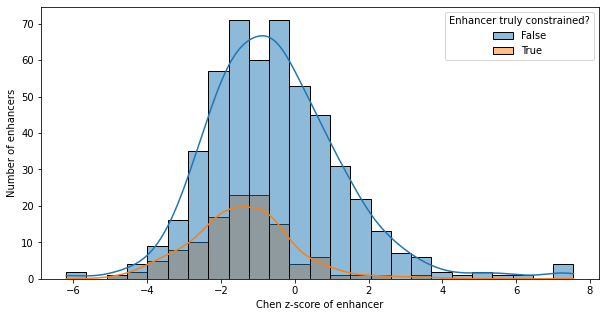

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_zscore_distributions(df):
  ax = sns.histplot(data=df, x='min negative_new_chen_score_window', kde=True, bins=25, hue='truly constrained')
  ax.set_xlabel('Chen z-score of enhancer')
  ax.set_ylabel('Number of enhancers')
  legend = ax.get_legend()
  legend.set_title('Enhancer truly constrained?')
  fig = plt.gcf()
  fig.set_size_inches(10, 5)

plot_zscore_distributions(ENHANCERS)

In [10]:
def predict_constraint_without_deletions(df, zscore_threshold): 
  score = 'min negative_new_chen_score_window'
  df = df[[score, 'truly constrained']].copy()
  df['predicted to be constrained'] = df[score] < zscore_threshold
  return df

predict_constraint_without_deletions(ENHANCERS, zscore_threshold=-2)

,min negative_new_chen_score_window,truly constrained,predicted to be constrained
0,-1.248459,False,False
1,-1.731383,False,False
2,-0.841769,False,False
3,-1.403148,False,False
4,0.845290,False,False
...,...,...,...
627,-1.462233,False,False
628,-1.356569,False,False
629,-1.356569,False,False
630,-2.111835,False,True


In [11]:
def predict_constraint_using_deletions(df, zscore_threshold): 
  score = 'min negative_new_chen_score_window'
  df = df[[
    score, 
    'truly constrained', 
    'enhancer is homozygously deleted in topmed'
  ]].copy()
  df['predicted to be constrained'] = (
    (df[score] < zscore_threshold) & 
    (df['enhancer is homozygously deleted in topmed'] == False)
  )
  return df

pd.set_option('display.max_rows', 10)

predict_constraint_using_deletions(ENHANCERS, zscore_threshold=-2)

,min negative_new_chen_score_window,truly constrained,enhancer is homozygously deleted in topmed,predicted to be constrained
0,-1.248459,False,True,False
1,-1.731383,False,True,False
2,-0.841769,False,True,False
3,-1.403148,False,True,False
4,0.845290,False,False,False
...,...,...,...,...
627,-1.462233,False,False,False
628,-1.356569,False,True,False
629,-1.356569,False,True,False
630,-2.111835,False,True,False


In [12]:
def compute_precision_recall(df, zscore_threshold, predict_constraint, log=False): 
  df = predict_constraint(df, zscore_threshold)
  
  contingency_table = pd.crosstab(
    df['predicted to be constrained'], 
    df['truly constrained']
  )

  if log:   
    print(zscore_threshold)
    print(contingency_table)

  tp = contingency_table.loc[True, True]
  fp = contingency_table.loc[True, False]
  fn = contingency_table.loc[False, True]
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)

  return precision, recall
  
compute_precision_recall(ENHANCERS, zscore_threshold=-2, predict_constraint=predict_constraint_without_deletions, log=True)

-2
truly constrained            False  True
predicted to be constrained             
False                          413    79
True                           101    39


(0.2785714285714286, 0.3305084745762712)

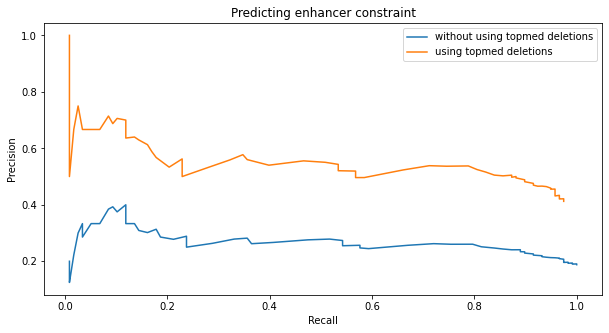

In [13]:
def plot_precision_recall(df, predict_constraint, label): 
  zscore_thresholds = np.arange(-4.5, 6.5, 0.1)
  precision_recall = [
    compute_precision_recall(df, zscore_threshold, predict_constraint)
    for zscore_threshold in zscore_thresholds
  ]
  precisions, recalls = zip(*precision_recall)
  plt.plot(recalls, precisions, label=label)

def plot_precision_recall_wrapper(df): 
  plot_precision_recall(df, predict_constraint_without_deletions, label='without using topmed deletions')
  plot_precision_recall(df, predict_constraint_using_deletions, label='using topmed deletions')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()
  fig = plt.gcf()
  fig.set_size_inches(10, 5)
  plt.title('Predicting enhancer constraint')

plot_precision_recall_wrapper(ENHANCERS)

## This test of the approach is weak

Labels are leaking to predictors because most of the enhancers that are homozygously deleted in 1000G (label) are also homozygously deleted in TopMed (predictor): 

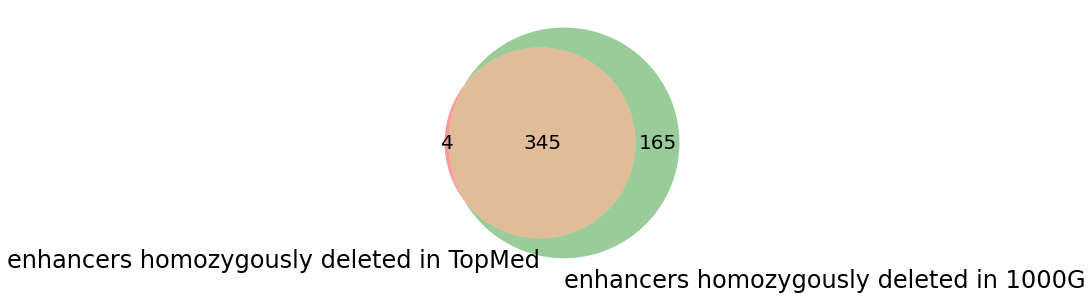

In [14]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the font size
mpl.rcParams['font.size'] = 20

def get_enhancers_deleted_in_topmed(df): 
  return df[df['enhancer is homozygously deleted in topmed']]['enhancer_id'].tolist()

def get_enhancers_deleted_in_1000_genomes(df):
  return df[df['tag'] == 'lof_tolerant']['enhancer_id'].tolist()

def plot_venn_diagram():
  venn2(
    [
      set(get_enhancers_deleted_in_topmed(ENHANCERS)), 
      set(get_enhancers_deleted_in_1000_genomes(ENHANCERS))
    ], 
    set_labels=('enhancers homozygously deleted in TopMed', 'enhancers homozygously deleted in 1000G')
  )
  fig = plt.gcf()
  fig.set_size_inches(10, 5)
  fig.set_facecolor('white')

plot_venn_diagram()

## Next steps 

Circumvent the problem of labels leaking to predictors by not relying upon homozygous deletions to label the enhancers.
Instead label a set of randomly chosen enhancers as not constrained, under the assumption that most enhancers are not constrained. 
Then use the Chen zscore, with and without homozygous deletions, to predict whether an enhancer is constrained or not.